ЛР4. 1. Реализуйте метод восстановления плотности:
- методом ядерного сглаживания
- с помощью ЕМ алгоритма

2. Возьмите любой набор случайных точек в любой библиотеке, например Sci-learn mkbpx и визуализируйте эти данные и ту плотность, котораая будет восстановлена вашими методами

3. Реализуйте меот метрополиса-гастинга для несимметричного
4. Реализуйте метод гиббса

5. Примените два этих метода на основе той функции плотности, которая была восстановлена на предыдущем пункте, тем самым вы получите другой набор точек.

6. Визуализировать 2 набора точек двумя разными цветами, сравнить с началом, и показать, где ошибки.

7*. Нарисовать отдельно картинку блуждания в случае трёхмерной функции плотности (метод метрополиса гастингса).

8* Нужно сравнить красный и синий набор точек вероятностными методами, KL-дивергенция.

In [7]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.mixture import GaussianMixture
from scipy.stats import gaussian_kde
from sklearn.datasets import make_moons, load_wine

In [2]:
# Генерация случайных данных
np.random.seed(30)
data = np.concatenate([np.random.normal(loc=-2, scale=0.7, size=300),
                       np.random.normal(loc=3, scale=0.7, size=300)])

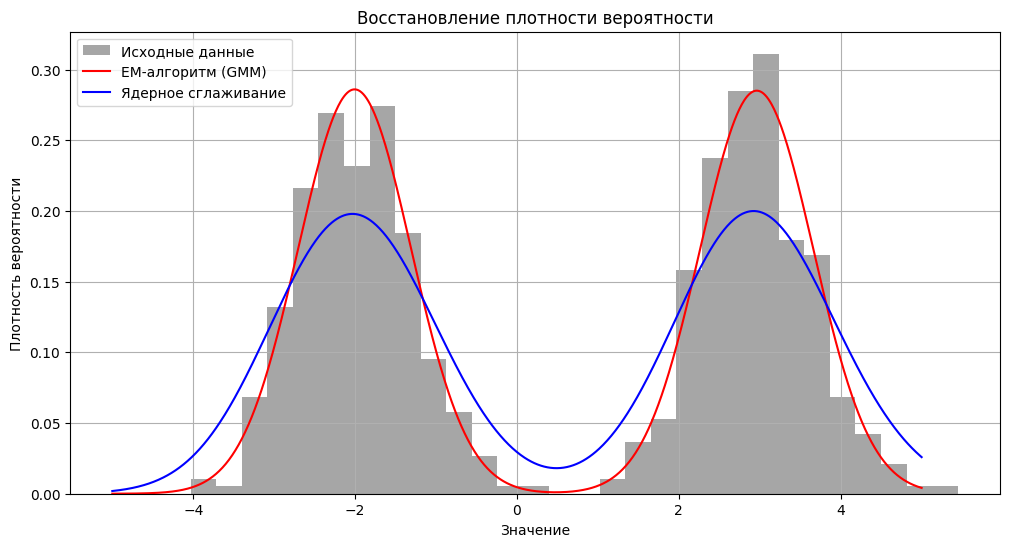

In [3]:
# Визуализация исходных данных
plt.figure(figsize=(12, 6))
plt.hist(data, bins=30, density=True, alpha=0.7, color='gray', label='Исходные данные')

# 1. Реализация EM-алгоритма

gmm = GaussianMixture(n_components=2)
gmm.fit(data.reshape(-1, 1))

# Получение значений плотности
x = np.linspace(-5, 5, 1000).reshape(-1, 1)
logprob = gmm.score_samples(x)
pdf_gmm = np.exp(logprob)

# Визуализация GMM
plt.plot(x, pdf_gmm, label='EM-алгоритм (GMM)', color='red')

# 2. Ядерное сглаживание
kde = gaussian_kde(data)
pdf_kde = kde(x.T)

# Визуализация ядерного сглаживания
plt.plot(x, pdf_kde, label='Ядерное сглаживание', color='blue')

# Настройка графика
plt.title('Восстановление плотности вероятности')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid()
plt.show()

In [9]:
data, _ = make_moons(n_samples=300, noise=0.1, random_state=30)

/tmp/ipykernel_2252/2197929612.py:20: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(X, Y, pdf_gmm, levels=15, cmap='Reds', alpha=0.5, label='EM-алгоритм (GMM)')
/tmp/ipykernel_2252/2197929612.py:27: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, pdf_kde, levels=15, cmap='Blues', alpha=0.5, linewidths=1.5, label='Ядерное сглаживание')


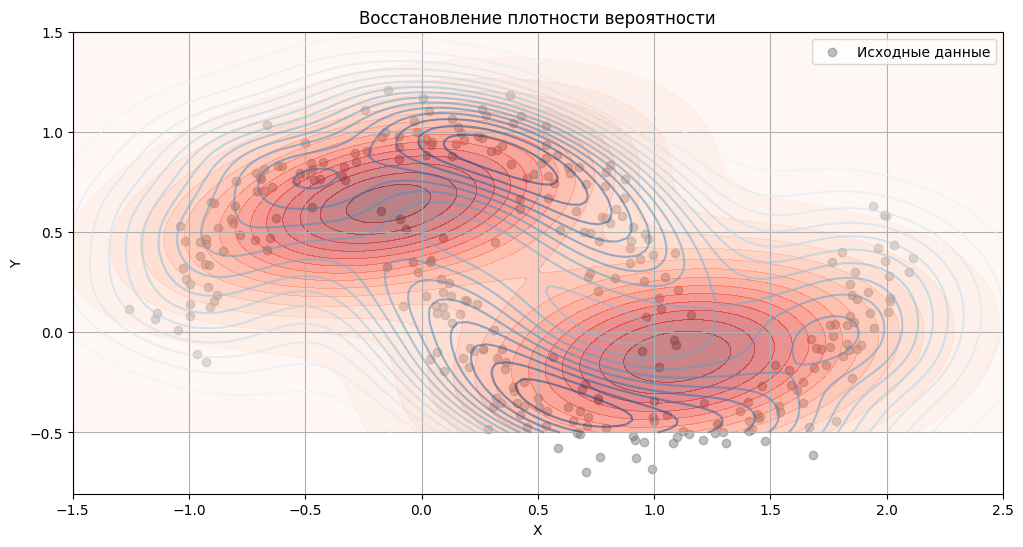

In [10]:
# Визуализация исходных данных (распределение точек)
plt.figure(figsize=(12, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.5, color='gray', label='Исходные данные')

# 1. Реализация EM-алгоритма (GMM)
gmm = GaussianMixture(n_components=2)
gmm.fit(data)

# Генерация сетки для визуализации плотности
x = np.linspace(-1.5, 2.5, 100)
y = np.linspace(-0.5, 1.5, 100)
X, Y = np.meshgrid(x, y)
xy = np.column_stack([X.ravel(), Y.ravel()])

# Получение значений плотности от GMM
logprob = gmm.score_samples(xy)
pdf_gmm = np.exp(logprob).reshape(X.shape)

# Визуализация GMM
plt.contourf(X, Y, pdf_gmm, levels=15, cmap='Reds', alpha=0.5, label='EM-алгоритм (GMM)')

# 2. Ядерное сглаживание
kde = gaussian_kde(data.T)
pdf_kde = kde(np.column_stack([X.ravel(), Y.ravel()]).T).reshape(X.shape)

# Визуализация ядерного сглаживания
plt.contour(X, Y, pdf_kde, levels=15, cmap='Blues', alpha=0.5, linewidths=1.5, label='Ядерное сглаживание')

# Настройка графика
plt.title('Восстановление плотности вероятности')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()

/tmp/ipykernel_2252/1403586311.py:30: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, pdf_kde, levels=15, cmap='Blues', alpha=0.5, linewidths=1.5, label='KDE')


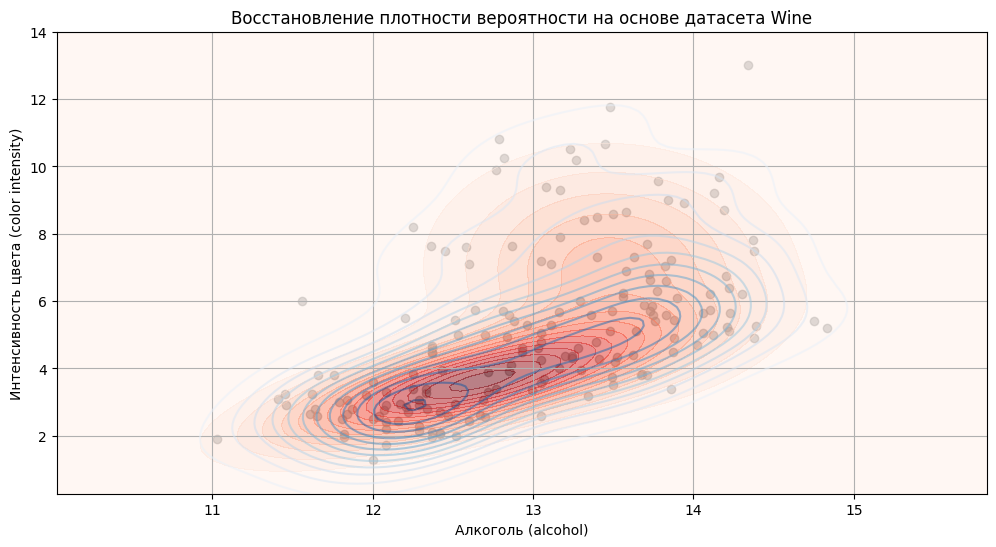

In [17]:
wine_data = load_wine()
data = wine_data.data[:, [0, 9]]  # Используем 'alcohol' и 'color intensity'

# Визуализация исходных данных (распределение точек)
plt.figure(figsize=(12, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.5, color='gray', label='Исходные данные')

# 1. Реализация EM-алгоритма (GMM)
gmm = GaussianMixture(n_components=2)
gmm.fit(data)

# Генерация сетки для визуализации плотности
x = np.linspace(data[:, 0].min() - 1, data[:, 0].max() + 1, 100)
y = np.linspace(data[:, 1].min() - 1, data[:, 1].max() + 1, 100)
X, Y = np.meshgrid(x, y)
xy = np.column_stack([X.ravel(), Y.ravel()])

# Получение значений плотности от GMM
logprob = gmm.score_samples(xy)
pdf_gmm = np.exp(logprob).reshape(X.shape)

# Визуализация GMM
plt.contourf(X, Y, pdf_gmm, levels=15, cmap='Reds', alpha=0.5)

# 2. Ядерное сглаживание
kde = gaussian_kde(data.T)
pdf_kde = kde(np.column_stack([X.ravel(), Y.ravel()]).T).reshape(X.shape)

# Визуализация ядерного сглаживания
plt.contour(X, Y, pdf_kde, levels=15, cmap='Blues', alpha=0.5, linewidths=1.5, label='KDE')

# Настройка графика
plt.title('Восстановление плотности вероятности на основе датасета Wine')
plt.xlabel('Алкоголь (alcohol)')
plt.ylabel('Интенсивность цвета (color intensity)')
#plt.legend(['GMM', 'Исходные данные'])
plt.grid()
plt.show()

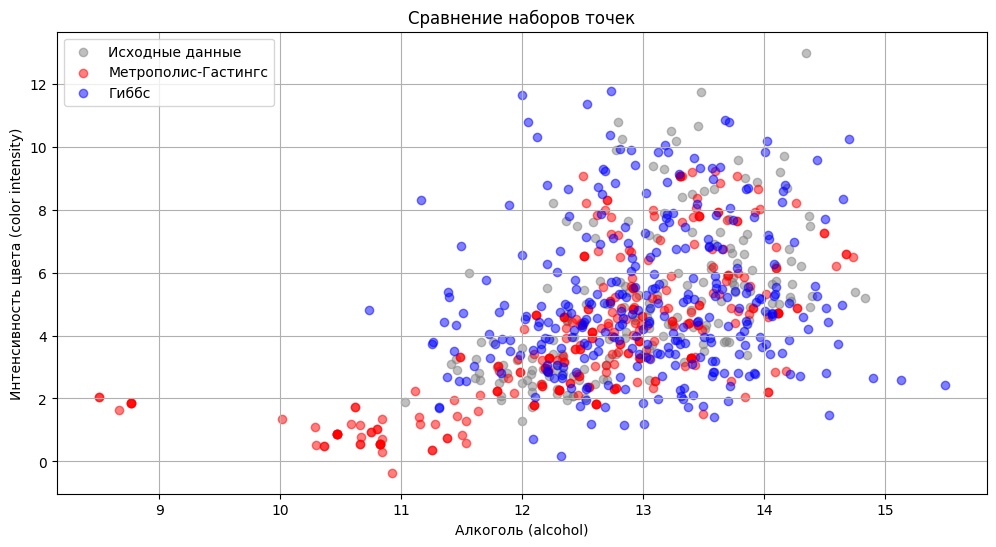

In [22]:
wine_data = load_wine()
data = wine_data.data[:, [0, 9]]  # Используем 'alcohol' и 'color intensity'

# Визуализация исходных данных (распределение точек)
# plt.figure(figsize=(12, 6))
# plt.scatter(data[:, 0], data[:, 1], alpha=0.5, color='gray', label='Исходные данные')

# 1. Реализация EM-алгоритма (GMM)
gmm = GaussianMixture(n_components=2)
gmm.fit(data)

# Генерация сетки для визуализации плотности
x = np.linspace(data[:, 0].min() - 1, data[:, 0].max() + 1, 100)
y = np.linspace(data[:, 1].min() - 1, data[:, 1].max() + 1, 100)
X, Y = np.meshgrid(x, y)
xy = np.column_stack([X.ravel(), Y.ravel()])

# Получение значений плотности от GMM
logprob = gmm.score_samples(xy)
pdf_gmm = np.exp(logprob).reshape(X.shape)
# 2. Методы генерации точек
def metropolis_hastings(gmm, num_samples):
    samples = []
    # Начальная точка
    current_sample = np.random.rand(2) * np.array([data[:, 0].max(), data[:, 1].max()])  
    for _ in range(num_samples):
        # Генерация candidate sample, плюс нормально распределенный шум
        candidate_sample = current_sample + np.random.normal(0, 0.5, 2)

        # Расчет вероятностей
        p_current = np.exp(gmm.score_samples(current_sample.reshape(1, -1)))
        p_candidate = np.exp(gmm.score_samples(candidate_sample.reshape(1, -1)))

        # Принимаем или отклоняем кандидат
        if np.random.rand() < p_candidate / p_current:
            samples.append(candidate_sample)
            current_sample = candidate_sample
        else:
            samples.append(current_sample)

    return np.array(samples)

def gibbs_sampling(gmm, num_samples):
    samples = []
    # Начальная точка
    current_sample = np.random.rand(2) * np.array([data[:, 0].max(), data[:, 1].max()])

    for _ in range(num_samples):
        # Для Gibb'са мы будем использовать текущее значение для одной переменной
        # и генерировать новое значение для другой
        current_y = current_sample[1]

        # Сначала выбор x по условной плотности
        x_samples = gmm.sample()[0][:, 0]  # генерируем x
        current_sample = np.array([x_samples[0], current_y])  # Обновляем x и y

        # Затем выбор y по условной плотности (мы используем сгенерированный X в модели)
        current_x = current_sample[0]
        y_samples = gmm.sample()[0][:, 1]  # генерируем y
        current_sample = np.array([current_x, y_samples[0]])

        samples.append(current_sample)

    return np.array(samples)

# Генерация новых данных
mh_samples = metropolis_hastings(gmm, 300)
gibbs_samples = gibbs_sampling(gmm, 300)

# Визуализация всех наборов данных
plt.figure(figsize=(12, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.5, color='gray', label='Исходные данные')
plt.scatter(mh_samples[:, 0], mh_samples[:, 1], alpha=0.5, color='red', label='Метрополис-Гастингс')
plt.scatter(gibbs_samples[:, 0], gibbs_samples[:, 1], alpha=0.5, color='blue', label='Гиббс')

# Настройка графика
plt.title('Сравнение наборов точек')
plt.xlabel('Алкоголь (alcohol)')
plt.ylabel('Интенсивность цвета (color intensity)')
plt.legend()
plt.grid()
plt.show()

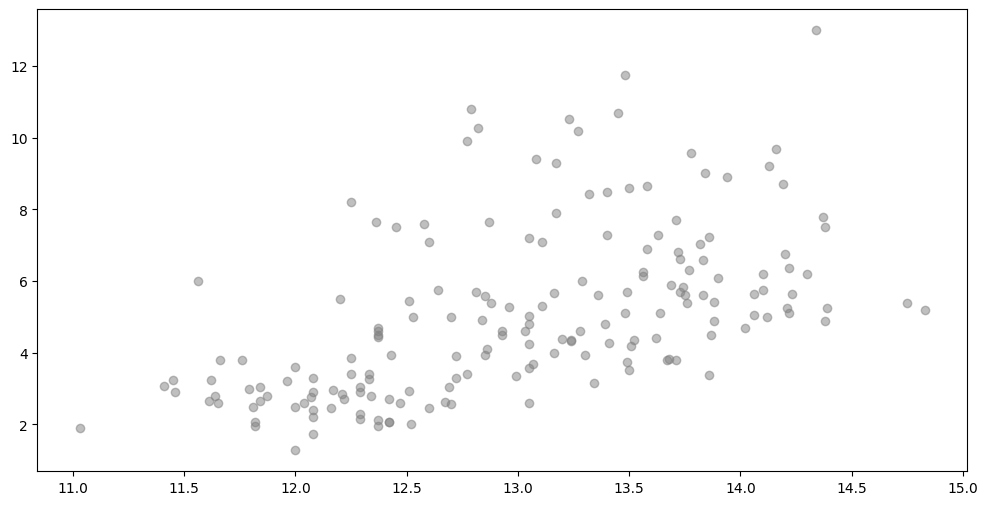

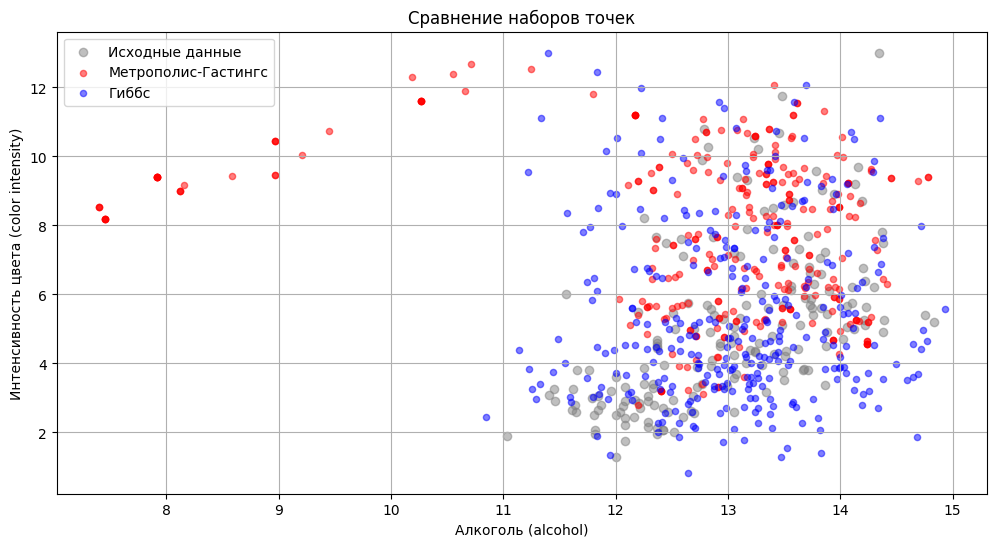

/tmp/ipykernel_2252/959220087.py:88: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(X, Y, pdf_gmm, levels=15, cmap='Greys', alpha=0.3, label='GMM Density')


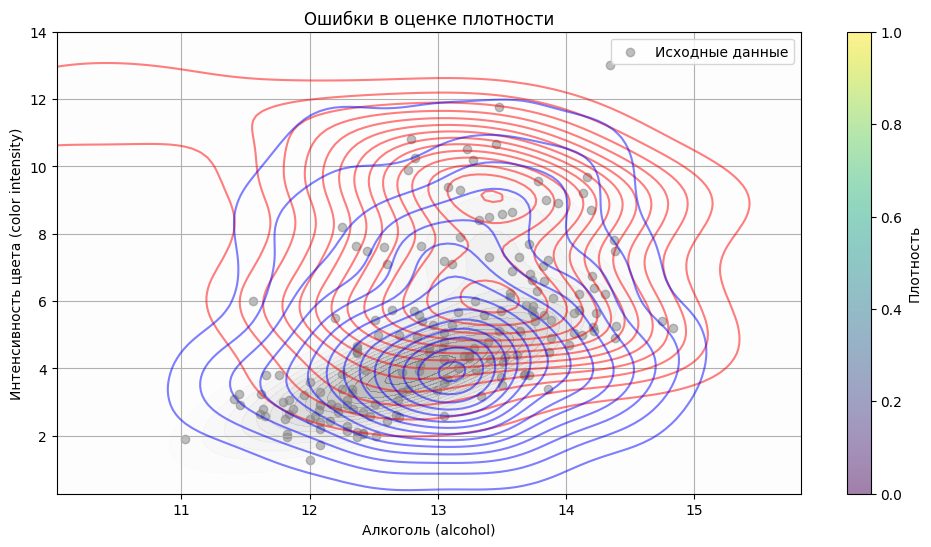

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.mixture import GaussianMixture
from scipy.stats import gaussian_kde
import seaborn as sns

# Загрузка датасета "wine"
wine_data = load_wine()
data = wine_data.data[:, [0, 9]]  # Используем 'alcohol' и 'color intensity'

# Визуализация исходных данных (распределение точек)
plt.figure(figsize=(12, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.5, color='gray', label='Исходные данные')

# 1. Реализация EM-алгоритма (GMM)
gmm = GaussianMixture(n_components=2)
gmm.fit(data)

# Генерация сетки для визуализации плотности
x = np.linspace(data[:, 0].min() - 1, data[:, 0].max() + 1, 100)
y = np.linspace(data[:, 1].min() - 1, data[:, 1].max() + 1, 100)
X, Y = np.meshgrid(x, y)
xy = np.column_stack([X.ravel(), Y.ravel()])

# Получение значений плотности от GMM
logprob = gmm.score_samples(xy)
pdf_gmm = np.exp(logprob).reshape(X.shape)

# 2. Методы генерации точек
def metropolis_hastings(gmm, num_samples):
    samples = []
    current_sample = np.random.rand(2) * np.array([data[:, 0].max(), data[:, 1].max()])
    for _ in range(num_samples):
        candidate_sample = current_sample + np.random.normal(0, 0.5, 2)
        p_current = np.exp(gmm.score_samples(current_sample.reshape(1, -1)))
        p_candidate = np.exp(gmm.score_samples(candidate_sample.reshape(1, -1)))
        if np.random.rand() < p_candidate / p_current:
            samples.append(candidate_sample)
            current_sample = candidate_sample
        else:
            samples.append(current_sample)

    return np.array(samples)

def gibbs_sampling(gmm, num_samples):
    samples = []
    current_sample = np.random.rand(2) * np.array([data[:, 0].max(), data[:, 1].max()])
    for _ in range(num_samples):
        current_y = current_sample[1]
        x_samples = gmm.sample()[0][:, 0]
        current_sample = np.array([x_samples[0], current_y])
        current_x = current_sample[0]
        y_samples = gmm.sample()[0][:, 1]
        current_sample = np.array([current_x, y_samples[0]])
        samples.append(current_sample)

    return np.array(samples)

# Генерация новых данных
mh_samples = metropolis_hastings(gmm, 300)
gibbs_samples = gibbs_sampling(gmm, 300)

# Оценка плотности точек, сгенерированных методами
kde_mh = gaussian_kde(mh_samples.T)
kde_gibbs = gaussian_kde(gibbs_samples.T)

# Генерация значений плотности для сетки
pdf_mh = kde_mh(np.column_stack((X.ravel(), Y.ravel())).T).reshape(X.shape)
pdf_gibbs = kde_gibbs(np.column_stack((X.ravel(), Y.ravel())).T).reshape(X.shape)

# Визуализация всех наборов данных
plt.figure(figsize=(12, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.5, color='gray', label='Исходные данные')
plt.scatter(mh_samples[:, 0], mh_samples[:, 1], alpha=0.5, color='red', label='Метрополис-Гастингс', s=20)
plt.scatter(gibbs_samples[:, 0], gibbs_samples[:, 1], alpha=0.5, color='blue', label='Гиббс', s=20)

# Настройка графика
plt.title('Сравнение наборов точек')
plt.xlabel('Алкоголь (alcohol)')
plt.ylabel('Интенсивность цвета (color intensity)')
plt.legend()
plt.grid()
plt.show()

# Визуализация ошибок: где метод генерирует много точек
plt.figure(figsize=(12, 6))
plt.contourf(X, Y, pdf_gmm, levels=15, cmap='Greys', alpha=0.3, label='GMM Density')
plt.contour(X, Y, pdf_mh, levels=15, colors='red', alpha=0.5)
plt.contour(X, Y, pdf_gibbs, levels=15, colors='blue', alpha=0.5)
plt.scatter(data[:, 0], data[:, 1], alpha=0.5, color='gray', label='Исходные данные')
plt.title('Ошибки в оценке плотности')
plt.xlabel('Алкоголь (alcohol)')
plt.ylabel('Интенсивность цвета (color intensity)')
plt.colorbar(label='Плотность')
plt.legend()
plt.grid()
plt.show()

In [15]:

x = np.linspace(-5, 5, 1000)
# Ядерное сглаживание
# kde = gaussian_kde(data)
# pdf_kde = kde(x)


# Метод Метрополиса-Гастингса
def metropolis_hastings(pdf, initial, iterations):
    samples = [initial]
    for _ in range(iterations):
        current = samples[-1]
        proposal = np.random.normal(current, 0.5)  # Пример изменения
        acceptance_ratio = pdf(proposal) / pdf(current)
        if acceptance_ratio > np.random.rand():
            samples.append(proposal)
        else:
            samples.append(current)
    return np.array(samples)

# Метод Гибсона (т.к. он по сути прост в данном случае, реализуем его аналогично)
def gibbs_sampling(pdf, initial, iterations):
    samples = [initial]
    for _ in range(iterations):
        current = samples[-1]
        proposal = np.random.normal(current, 0.5)  # Пример изменения
        samples.append(proposal)
    return np.array(samples)

# Восстановление плотности вероятности для Метрополиса-Гастингса
pdf_function = kde.evaluate

# Генерация выборок
initial_point = 0
mh_samples = metropolis_hastings(pdf_function, initial_point, 1000)
gibbs_samples = gibbs_sampling(pdf_function, initial_point, 1000)

# Визуализация выборок
plt.figure(figsize=(12, 6))
plt.hist(data, bins=30, density=True, alpha=0.5, color='gray', label='Исходные данные')
plt.hist(mh_samples, bins=30, density=True, alpha=0.5, color='red', label='Метрополис-Гастингс')
plt.hist(gibbs_samples, bins=30, density=True, alpha=0.5, color='blue', label='Гиббс')

plt.title('Сравнение выборок')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid()
plt.show()

ValueError: points have dimension 1, dataset has dimension 2

In [36]:
kde.evaluate

<bound method gaussian_kde.evaluate of <scipy.stats._kde.gaussian_kde object at 0x7f73b041f430>>

In [34]:
pdf_gmm.shape

(1000,)

In [12]:
# Расстояние Кульбака-Лейблера
def kullback_leibler(p, q):
    # Избегаем деления на ноль
    p = np.clip(p, 1e-10, None)
    q = np.clip(q, 1e-10, None)
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

# Оценка плотности для MH и Gibbs образцов
pdf_mh = gaussian_kde(mh_samples)
pdf_gibbs = gaussian_kde(gibbs_samples)

# Находим расстояния Кульбака-Лейблера
kl_mh = kullback_leibler(pdf_kde(x), pdf_mh(x))
kl_gibbs = kullback_leibler(pdf_kde(x), pdf_gibbs(x))

print(f"Расстояние Кульбака-Лейблера для MH: {kl_mh:.4f}")
print(f"Расстояние Кульбака-Лейблера для Gibbs: {kl_gibbs:.4f}")

TypeError: 'numpy.ndarray' object is not callable

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (1000,) and arg 2 with shape (1001,).

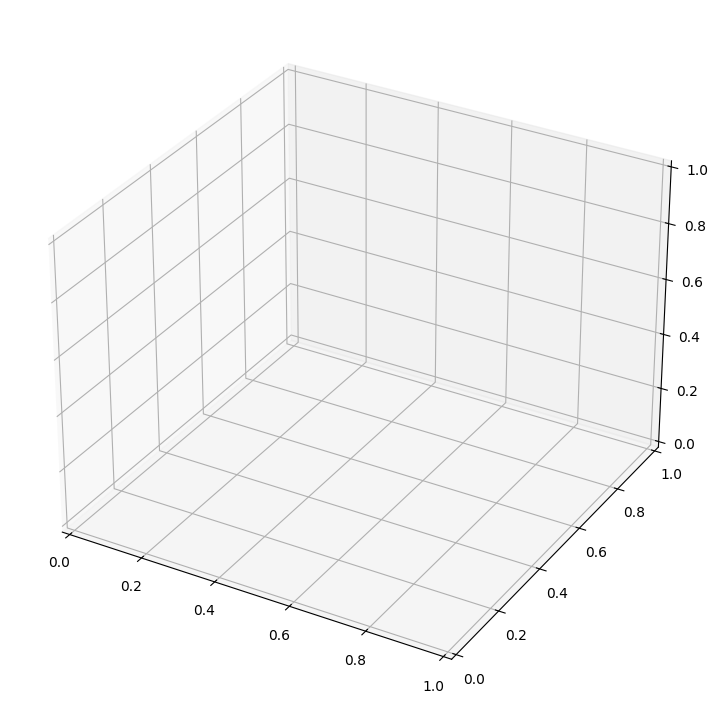

In [13]:
# 4. Блуждание в 3D
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mh_samples[:-1], pdf_mh(mh_samples[:-1]), np.arange(len(mh_samples)), color='red', s=1)
#ax.scatter(gibbs_samples[:-1], pdf_gibbs(gibbs_samples[:-1]), np.arange(len(gibbs_samples)), color='blue', s=1)

ax.set_title("Блуждание выборок Метрополиса-Гастингса и Гиббса")
ax.set_xlabel("Значения")
ax.set_ylabel("Плотность вероятности")
ax.set_zlabel("Итерация")
plt.show()